<a href="https://colab.research.google.com/github/sagihuja/projects/blob/main/eda_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install pycountry
! pip install pycountry_convert
! pip install folium
! pip install geopandas

     |████████████████████████████████| 10.1 MB 12.9 MB/s 
  Created wheel for pycountry: filename=pycountry-22.1.10-py2.py3-none-any.whl size=10595784 sha256=455bdc8e76bf533152b029935ea04d4602b9136fd24876ccd682cb9d11ed4d64
  Stored in directory: /root/.cache/pip/wheels/f7/8f/9c/b070d7376caf2beb0685bf72578106b2fd57019ed57d84f126
Successfully built pycountry
     |████████████████████████████████| 213 kB 25.2 MB/s 
     |████████████████████████████████| 280 kB 90.3 MB/s 
     |████████████████████████████████| 280 kB 101.6 MB/s 
     |████████████████████████████████| 280 kB 105.1 MB/s 
     |████████████████████████████████| 280 kB 101.8 MB/s 
     |████████████████████████████████| 279 kB 96.6 MB/s 
     |████████████████████████████████| 279 kB 96.0 MB/s 
     |████████████████████████████████| 272 kB 96.5 MB/s 
     |████████████████████████████████| 272 kB 66.4 MB/s 
     |████████████████████████████████| 272 kB 92.7 MB/s 
     |████████████████████████████████| 270 kB 91.9 MB/s 

# New section

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import pycountry
import pycountry_convert as pc
import geopandas as gpd
from scipy.stats import linregress
import folium
plt.style.use('seaborn')

In [5]:
pd.options.display.max_rows = 60
pd.options.display.min_rows = 20

In [6]:
#url = 'https://www.kaggle.com/mathurinache/natural-disasters-data-explorer/download'

#resp = requests.get(url)
#text = resp.text

#with open('master.csv', 'w') as fh:
#   fh.write(text)
  
natural_deaths_df = pd.read_csv('natural-disasters.csv')


In [9]:
natural_deaths_df.head()


,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,"Number of people affected by drought per 100,000",Homelessness rate from drought,"Total number of people affected by drought per 100,000",Number of deaths from earthquakes,Number of people injured from earthquakes,Number of people affected by earthquakes,Number of people left homeless from earthquakes,Number of total people affected by earthquakes,Reconstruction costs from earthquakes,Insured damages against earthquakes,Total economic damages from earthquakes,Death rates from earthquakes,Injury rates from earthquakes,"Number of people affected by earthquakes per 100,000",Homelessness rate from earthquakes,"Total number of people affected by earthquakes per 100,000",Number of deaths from disasters,Number of people injured from disasters,Number of people affected by disasters,Number of people left homeless from disasters,Number of total people affected by disasters,Reconstruction costs from disasters,Insured damages against disasters,Total economic damages from disasters,Death rates from disasters,Injury rates from disasters,"Number of people affected by disasters per 100,000",Homelessness rate from disasters,"Total number of people affected by disasters per 100,000",Number of deaths from volcanic activity,...,Number of people injured from extreme temperatures,Number of people affected by extreme temperatures,Number of people left homeless from extreme temperatures,Number of total people affected by extreme temperatures,Reconstruction costs from extreme temperatures,Insured damages against extreme temperatures,Total economic damages from extreme temperatures,Death rates from extreme temperatures,Injury rates from extreme temperatures,"Number of people affected by extreme temperatures per 100,000",Homelessness rate from extreme temperatures,"Total number of people affected by extreme temperatures per 100,000",Number of deaths from glacial lake outbursts,Number of people injured from glacial lake outbursts,Number of people affected by glacial lake outbursts,Number of people left homeless from glacial lake outbursts,Number of total people affected by glacial lake outbursts,Reconstruction costs from glacial lake outbursts,Insured damages against glacial lake outbursts,Total economic damages from glacial lake outbursts,Death rates from glacial lake outbursts,Injury rates from glacial lake outbursts,"Number of people affected by glacial lake outbursts per 100,000",Homelessness rate from glacial lake outbursts,"Total number of people affected by glacial lake outbursts per 100,000",Total economic damages from disasters as a share of GDP,Total economic damages from drought as a share of GDP,Total economic damages from earthquakes as a share of GDP,Total economic damages from extreme temperatures as a share of GDP,Total economic damages from floods as a share of GDP,Total economic damages from landslides as a share of GDP,Total economic damages from mass movements as a share of GDP,Total economic damages from storms as a share of GDP,Total economic damages from volcanic activity as a share of GDP,Total economic damages from volcanic activity as a share of GDP.1,Entity,Year,deaths_rate_per_100k_storm,injured_rate_per_100k_storm,total_affected_rate_per_100k_all_disasters
0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.0,0.0,0.000000,0,0.000000,210.0,200.0,0.0,0.0,200.0,NaN,NaN,NaN,2.572748,2.381236,0.000000,0.000000,2.381236,215.1,200.0,0.0,0.0,200.0,NaN,NaN,NaN,2.633470,2.381236,0.000000,0.000000,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000000,0.0,0.000000,0.0,0.000000,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,1950,0.000000,0.0,2.381236
1,0.0,0.0,4800.0,0,480

In [21]:
natural_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Columns: 171 entries, Number of deaths from drought to total_affected_rate_per_100k_all_disasters
dtypes: float64(152), int64(18), object(1)
memory usage: 2.1+ MB


In [31]:
deaths_df = natural_deaths_df[[
                   'Number of deaths from drought', 'Death rates from drought',
                   'Number of deaths from earthquakes','Death rates from earthquakes',
                   'Number of deaths from disasters', 'Death rates from disasters',
                   'Number of deaths from volcanic activity', 'Death rates from volcanic activity',
                   'Number of deaths from glacial lake outbursts', 'Death rates from glacial lake outbursts',
                   'Number of deaths from floods', 'Death rates from floods',
                   'Number of deaths from mass movements', 'Death rates from mass movements',
                   'Number of deaths from storms', 'Death rates from storms',
                   'Number of deaths from landslides', 'Death rates from landslides',
                   'Number of deaths from fog', 'Death rates from fog',
                   'Number of deaths from wildfires', 'Death rates from wildfires',
                   'Number of deaths from extreme temperatures', 'Death rates from extreme temperatures',
                   'Entity',
                   'Year',
                   'total_affected_rate_per_100k_all_disasters'
                   ]]

In [42]:
deaths_df.describe()

,Number of deaths from drought,Death rates from drought,Number of deaths from earthquakes,Death rates from earthquakes,Number of deaths from disasters,Death rates from disasters,Number of deaths from volcanic activity,Death rates from volcanic activity,Number of deaths from glacial lake outbursts,Death rates from glacial lake outbursts,Number of deaths from floods,Death rates from floods,Number of deaths from mass movements,Death rates from mass movements,Number of deaths from storms,Death rates from storms,Number of deaths from landslides,Death rates from landslides,Number of deaths from fog,Death rates from fog,Number of deaths from wildfires,Death rates from wildfires,Number of deaths from extreme temperatures,Death rates from extreme temperatures,Year,total_affected_rate_per_100k_all_disasters
count,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.0,0.0,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,0.0,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000,1604.000000
mean,2775.904988,4.714486,564.640835,0.715824,5517.306484,7.282751,21.646135,0.294226,0.0,NaN,1741.779863,0.343414,1.145387,0.002335,348.586534,NaN,15.020574,0.027419,0.997506,0.000581,1.091521,0.001341,46.493142,0.029498,1970.012469,1035.891535
std,27015.829669,91.534780,3486.225081,6.759056,38637.046806,93.607514,212.887948,8.561051,0.0,NaN,24025.425792,4.475227,11.470489,0.048445,2347.979388,NaN,86.221624,0.314318,19.956346,0.019850,7.284588,0.008798,492.755205,0.246133,30.962918,2404.238288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,5.300000,0.092206,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1980.000000,33.259217
75%,0.000000,0.000000,1.700000,0.006780,85.725000,0.591138,0.000000,0.000000,0.0,NaN,7.025000,0.043729,0.000000,0.000000,3.900000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,686.393967
max,472400.000000,2987.149499,45363.500000,223.726209,523893.100000,2987.149499,3943.700000,336.551902,0.0,NaN,436146.500000,134.837990,215.000000,1.860638,35720.300000,NaN,1752.500000,9.430785,400.000000,0.789718,107.300000,0.118406,9167.900000,3.902533,2010.000000,18032.535470


In [41]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Number of deaths from drought                 1604 non-null   float64
 1   Death rates from drought                      1604 non-null   float64
 2   Number of deaths from earthquakes             1604 non-null   float64
 3   Death rates from earthquakes                  1604 non-null   float64
 4   Number of deaths from disasters               1604 non-null   float64
 5   Death rates from disasters                    1604 non-null   float64
 6   Number of deaths from volcanic activity       1604 non-null   float64
 7   Death rates from volcanic activity            1604 non-null   float64
 8   Number of deaths from glacial lake outbursts  1604 non-null   int64  
 9   Death rates from glacial lake outbursts       0 non-null      f

In [38]:
deaths_df.set_index(['Year','Entity'])

,,Number of deaths from drought,Death rates from drought,Number of deaths from earthquakes,Death rates from earthquakes,Number of deaths from disasters,Death rates from disasters,Number of deaths from volcanic activity,Death rates from volcanic activity,Number of deaths from glacial lake outbursts,Death rates from glacial lake outbursts,Number of deaths from floods,Death rates from floods,Number of deaths from mass movements,Death rates from mass movements,Number of deaths from storms,Death rates from storms,Number of deaths from landslides,Death rates from landslides,Number of deaths from fog,Death rates from fog,Number of deaths from wildfires,Death rates from wildfires,Number of deaths from extreme temperatures,Death rates from extreme temperatures,total_affected_rate_per_100k_all_disasters
Year,Entity,,,,,,,,,,,,,,,,,,,,,,,,,
1950,Afghanistan,0.0,0.000000,210.0,2.572748,215.1,2.633470,0.0,0.000000,0,NaN,5.1,0.060722,0.0,0.0,0.0,NaN,0.0,0.000000,0,0.0,0.0,0.0,0.0,0.000000,2.381236
1960,Afghanistan,0.0,0.000000,0.0,0.000000,10.7,0.112124,0.0,0.000000,0,NaN,10.7,0.112124,0.0,0.0,0.0,NaN,0.0,0.000000,0,0.0,0.0,0.0,0.0,0.000000,44.060951
1970,Afghanistan,0.0,0.000000,6.1,0.047960,48.2,0.391674,0.0,0.000000,0,NaN,32.1,0.256567,0.0,0.0,0.0,NaN,10.0,0.087146,0,0.0,0.0,0.0,0.0,0.000000,547.029875
1980,Afghanistan,0.0,0.000000,51.3,0.398499,58.3,0.458817,0.0,0.000000,0,NaN,0.0,0.000000,0.0,0.0,0.0,NaN,7.0,0.060319,0,0.0,0.0,0.0,0.0,0.000000,218.081859
1990,Afghanistan,0.0,0.000000,742.6,3.814559,1038.9,5.830222,0.0,0.000000,0,NaN,199.0,1.414652,0.0,0.0,1.0,NaN,73.9,0.418517,0,0.0,0.0,0.0,22.4,0.176172,316.150814
2000,Afghanistan,3.7,0.017806,123.6,0.544497,448.7,1.796376,0.0,0.000000,0,NaN,117.5,0.454938,0.0,0.0,33.1,NaN,4.3,0.016327,0,0.0,0.0,0.0,166.5,0.634600,2444.428454
2010,Afghanistan,0.0,0.000000,21.7,0.066190,263.1,0.793282,0.0,0.000000,0,NaN,137.0,0.410915,0.0,0.0,15.1,NaN,84.8,0.257424,0,0.0,0.0,0.0,4.5,0.014441,4378.180393
1900,Africa,1100.0,0.832564,10.0,0.007495,1111.7,0.841394,1.7,0.001335,0,NaN,0.0,0.000000,0.0,0.0,0.0,NaN,0.0,0.000000,0,0.0,0.0,0.0,0.0,0.000000,0.000000
1910,Africa,8500.0,5.988296,1.2,0.000845,8501.2,5.989141,0.0,0.000000,0,NaN,0.0,0.000000,0.0,0.0,0.0,NaN,0.0,0.000000,0,0.0,0.0,0.0,0.0,0.000000,2.254417


In [48]:
deaths_df.max()
column = deaths_df["Number of deaths from drought"]
max_index = column.idxmax()
print(max_index)

1575


In [49]:
deaths_df.groupby("Year").apply(lambda df:df.irow(df.value.argmax()))

AttributeError: ignored

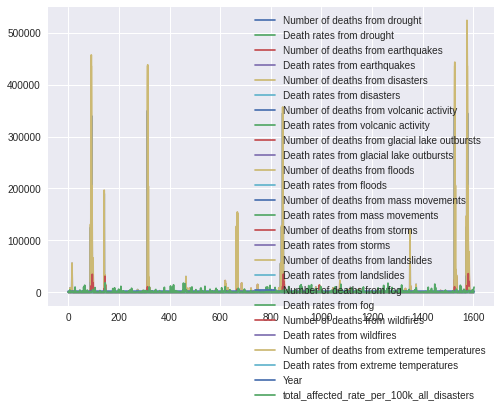

In [50]:
deaths_df.plot()